In [10]:
print(train_generator.class_indices)


{'Ain': 0, 'Al': 1, 'Alef': 2, 'Beh': 3, 'Dad': 4, 'Dal': 5, 'Feh': 6, 'Ghain': 7, 'Hah': 8, 'Heh': 9, 'Jeem': 10, 'Kaf': 11, 'Khah': 12, 'Laa': 13, 'Lam': 14, 'Meem': 15, 'Noon': 16, 'Qaf': 17, 'Reh': 18, 'Sad': 19, 'Seen': 20, 'Sheen': 21, 'Tah': 22, 'Teh': 23, 'Teh_Marbuta': 24, 'Thal': 25, 'Theh': 26, 'Waw': 27, 'Yeh': 28, 'Zah': 29, 'Zain': 30}


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

Found 5601 images belonging to 31 classes.
Found 1384 images belonging to 31 classes.
عدد الفئات: 31


/home/ragab/Desktop/pattern/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/ragab/Desktop/pattern/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.0747 - loss: 3.7706 - val_accuracy: 0.0318 - val_loss: 4.2722 - learning_rate: 0.0010
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.1926 - loss: 2.7840 - val_accuracy: 0.0484 - val_loss: 6.7699 - learning_rate: 0.0010
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.3505 - loss: 2.0588 - val_accuracy: 0.0621 - val_loss: 8.0938 - learning_rate: 0.0010
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.4874 - loss: 1.5638 - val_accuracy: 0.2428 - val_loss: 2.7655 - learning_rate: 0.0010
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 333s 2s/step - accuracy: 0.5719 - loss: 1.2718 - val_accuracy: 0.4184 - val_loss: 2.2411 - learning_rate: 0.0010
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.6400 - loss: 1.0766 - val_accuracy: 0.1828 - val_loss: 7.8528 - learning_rate: 0.0010
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.6915 - loss: 0.

44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9409 - loss: 0.1714
Validation accuracy: 0.9357
Validation loss: 0.2097


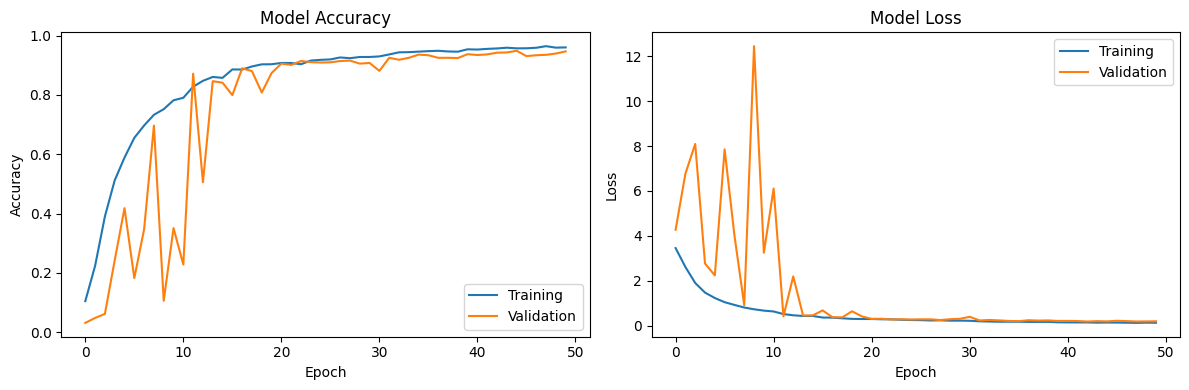

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##################   love u
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 224 
BATCH_SIZE = 32
DATA_DIR = '/home/ragab/Desktop/pattern/dataset1'
EPOCHS = 100


train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,  
    validation_split=0.2
)


val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    DATA_DIR, 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='training', 
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    DATA_DIR, 
    target_size=(IMG_SIZE, IMG_SIZE), 
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='validation', 
    shuffle=False
)

num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")
print(f"Class indices: {train_generator.class_indices}")

class_counts = np.zeros(num_classes)
for _, labels in train_generator:
    for label in labels:
        class_counts += label
    if len(class_counts[class_counts==0]) == 0:
        break



base_model = MobileNetV2(
    weights='imagenet', 
    include_top=False, 
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    ModelCheckpoint(
        "best_mobilenetv2_arsl_phase1.h5", 
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max'
    ),
    EarlyStopping(
        monitor='val_accuracy', 
        patience=10, 
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5, 
        patience=5, 
        min_lr=1e-6
    )
]


model.summary()


print("Phase 1: Training top layers only...")
history_phase1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  
    callbacks=callbacks
)


print("Phase 2: Fine-tuning base-model layers of MobileNetV2...")

for layer in base_model.layers[-30:]:
    layer.trainable = True


model.compile(
    optimizer=Adam(learning_rate=0.0001),  
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


callbacks = [
    ModelCheckpoint(
        "best_mobilenetv2_arsl_final.h5", 
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max'
    ),
    EarlyStopping(
        monitor='val_accuracy', 
        patience=15, 
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=5, 
        min_lr=1e-7
    )
]


history_phase2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    initial_epoch=len(history_phase1.history['loss']), 
    callbacks=callbacks
)

# Combine histories for plotting
history = {}
for key in history_phase1.history.keys():
    history[key] = history_phase1.history[key] + history_phase2.history[key]


plt.figure(figsize=(12, 4))

##########################################################################################
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

##########################################################################################
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()


model.save("mobilenetv2_arsl_final.h5")


final_results = model.evaluate(val_generator)
print(f"Final validation loss: {final_results[0]:.4f}")
print(f"Final validation accuracy: {final_results[1]:.4f}")

val_generator.reset()
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, y_pred)
class_names = list(train_generator.class_indices.keys())


plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.png')
plt.show()


print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

IMG_SIZE = 128  
BATCH_SIZE = 32
DATA_DIR = '/home/ragab/Desktop/pattern/dataset2'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_generator.num_classes
print(f"عدد الفئات: {num_classes}")

cnn_model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Block 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



optimizer = Adam(learning_rate=0.001)
cnn_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001
    )
]


history = cnn_model.fit(
    train_generator,
    epochs=50,  
    validation_data=val_generator,
    callbacks=callbacks
)


cnn_model.save('arabic_sign_lightweight_model.h5')


val_loss, val_accuracy = cnn_model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy:.4f}")
print(f"Validation loss: {val_loss:.4f}")


import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

################################################################################################  loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('training_history_lightweight.png')
plt.show()
